# ※ 필요한 패키지 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_csv('daegu.csv', encoding = 'cp949')

In [3]:
df_pre = pd.read_csv('output/daegu_pre.csv')

In [4]:
df_pre.head()

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444,60.743550
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000,62.734310
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668,64.650381
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110,65.727719
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557,67.046081


<hr>

# 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 임낙현

In [5]:
# 상대습도의 결측치인 -1, -50, 0 의 개수들을 세어봄
humidity=df_pre.loc[:,'humidity']

print(humidity.loc[humidity==-1].count())
print(humidity.loc[humidity==-50].count())
print(humidity.loc[humidity==0].count())

30222
0
682


In [6]:
# 온도의 결측치인 -1, -50, 0 의 개수들을 세어봄
temp=df_pre.loc[:,'temp']

print(temp.loc[temp==-1].count())
print(temp.loc[temp==-50].count())
print(temp.loc[temp==0].count())

47171
6062
69673


In [7]:
# 상대습도의 결측치들 -1, -50, 0 을 NaN으로 변경
humidity_1=humidity.replace(-1,np.nan)
humidity_2=humidity_1.replace(-50,np.nan)
humidity_pre=humidity_2.replace(0,np.nan)

print(humidity_pre.loc[humidity==-1].count())
print(humidity_pre.loc[humidity==-50].count())
print(humidity_pre.loc[humidity==0].count())

0
0
0


In [8]:
# 온도의 결측치들 -1, -50 을 NaN으로 변경
temp_1=temp.replace(-1,np.nan)
temp_pre=temp_1.replace(-50,np.nan)

print(temp_pre.loc[temp_pre==-1].count())
print(temp_pre.loc[temp_pre==-50].count())

0
0


In [9]:
# 온도와 상대습도 Series들을 합쳐서 데이터프레임으로 만듦
tem_hum=pd.concat([temp_pre,humidity_pre],axis=1)
tem_hum.head()

,temp,humidity
0,16.500000,53.0
1,18.100000,49.0
2,19.700001,46.0
3,20.799999,41.0
4,22.200001,36.0


In [10]:
# 날짜와 지역만 있는 데이터프레임을 만듦
df_nh=df_pre.loc[:,['year','month','day','hour','region']]

# 온도와 상대습도를 합친 데이터프레임과 날짜와 지역이 있는 데이터프레임을 합침
temp_mv=pd.concat([df_nh,tem_hum],axis=1)

# 온도를 소수점 아래 둘째자리에서 반올림 한 것으로 만듦
temp_mv['temp']=round(temp_mv['temp'],2)
temp_mv.head() # 데이터 확인

,year,month,day,hour,region,temp,humidity
0,2010,6,1,0,동인동,16.5,53.0
1,2010,6,1,1,동인동,18.1,49.0
2,2010,6,1,2,동인동,19.7,46.0
3,2010,6,1,3,동인동,20.8,41.0
4,2010,6,1,4,동인동,22.2,36.0


In [11]:
# 위에서 만든 데이터프레임에서 달이 3이상 11이하인 곳에있는 온도 0을 결측치로 대체함
index=list(temp_mv[(temp_mv['month']>=3)&(temp_mv['month']<=11)&(temp_mv['temp']==0)].index)
temp_mv.loc[index,'temp']=np.nan

In [12]:
# 위에서 대체한 결측치들을 forward방향으로 linear하게 대체해 줌
temp_fin=temp_mv.interpolate(method='linear',limit_direction='forward')

In [13]:
# 상대습도의 값들이 어떤것이 있나 확인
temp_fin['humidity'].unique()

array([ 53.        ,  49.        ,  46.        ,  41.        ,
        36.        ,  34.        ,  35.        ,  35.5       ,
        43.        ,  44.        ,  57.        ,  62.        ,
        67.        ,  60.        ,  65.        ,  64.        ,
        69.        ,  71.        ,  74.        ,  66.        ,
        59.        ,  48.        ,  40.        ,  39.        ,
        37.        ,  33.        ,  30.        ,  38.        ,
        42.        ,  52.        ,  55.        ,  68.        ,
        73.        ,  75.        ,  76.        ,  70.        ,
        56.        ,  32.        ,  28.        ,  27.        ,
        26.        ,  25.        ,  54.        ,  72.        ,
        63.        ,  47.        ,  31.        ,  29.        ,
        58.        ,  61.        ,  22.        ,  35.66666667,
        34.33333333,  31.66666667,  30.33333333,  23.        ,
        24.        ,  21.        ,  50.        ,  51.        ,
        79.        ,  80.        ,  78.        ,  45.  

In [14]:
# 결측치가 대체되어서 모든 column에서 false로 나오는지 확인해 봄
temp_fin.isna().any()

year        False
month       False
day         False
hour        False
region      False
temp        False
humidity    False
dtype: bool

In [15]:
# 위에서 만든 온도와 상대습도의 결측치가 대체된 데이터프레임에서 열지수(체감온도) column을 생성한다.
df5 = temp_fin[:]

df5['temp_F'] = df5['temp'] * 1.8 + 32

df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humidity'] + .00085282*df5['temp_F']*df5['humidity']*df5['humidity'] - .00000199*df5['temp_F']*df5['temp_F']*df5['humidity']*df5['humidity']

index = list(df5[(df5['humidity'] <= 13) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 112)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] - ((13 - df5.loc[index,'humidity']) / 4) * ((17 - abs(df5.loc[index,'temp_F'] - 95)) / 17) ** 0.5

index = list(df5[(df5['humidity'] > 85) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 87)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] + 0.02 * (df5.loc[index,'humidity'] - 85) * (87 - df5.loc[index,'temp_F'])

df5['A'] = -10.3 + 1.1 * df5['temp_F'] + 0.047 * df5['humidity']
index = list(df5.loc[df5['A'] < 79].index)
df5.loc[index,'HI'] = df5.loc[index,'A']

index = list(df5.loc[df5['temp_F'] < 40].index)
df5.loc[index,'HI'] = df5.loc[index,'temp_F']

df5.drop(columns = ['A'], axis=1, inplace=True)
df5.drop(columns = 'temp_F', axis=1, inplace=True)
df5['HI'] = (df5['HI'] - 32) / 1.8
df5

C:\Users\User\AppData\Local\Temp\ipykernel_1852\22480632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['temp_F'] = df5['temp'] * 1.8 + 32
C:\Users\User\AppData\Local\Temp\ipykernel_1852\22480632.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humidi

,year,month,day,hour,region,temp,humidity,HI
0,2010,6,1,0,동인동,16.5,53.0,15.589444
1,2010,6,1,1,동인동,18.1,49.0,17.245000
2,2010,6,1,2,동인동,19.7,46.0,18.926667
3,2010,6,1,3,동인동,20.8,41.0,20.006111
4,2010,6,1,4,동인동,22.2,36.0,21.415556
...,...,...,...,...,...,...,...,...
14831611,2022,4,30,19,구지면,10.7,71.0,9.679444
14831612,2022,4,30,20,구지면,11.0,65.0,9.852778
14831613,2022,4,30,21,구지면,11.9,61.0,10.738333
14831614,2022,4,30,22,구지면,13.4,53.0,12.179444


In [16]:
# 열수치를 만들며 df5가 되었던 데이터프레임을 아래에 사용하기 위한 temp_pre로 바꾸어준다.
temp_pre=df5[:]

# 몇년도 부터 몇년도 까지의 데이터가 있는지 확인
temp_pre['year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

In [17]:
# temp_pre에 있는 지역들의 값들을 확인함
regions=temp_pre['region'].unique()
print(regions)

['동인동' '삼덕동' '성내1동' '성내2동' '성내3동' '대신동' '남산1동' '남산2동' '남산3동' '남산4동' '대봉1동'
 '대봉2동' '신암1동' '신암2동' '신암3동' '신암4동' '신암5동' '신천1.2동' '신천3동' '신천4동' '효목1동'
 '효목2동' '도평동' '불로.봉무동' '지저동' '동촌동' '방촌동' '해안동' '안심1동' '안심2동' '안심3동'
 '안심3.4동' '안심4동' '혁신동' '공산동' '내당1동' '내당2.3동' '내당4동' '비산1동' '비산2.3동' '비산4동'
 '비산5동' '비산6동' '비산7동' '평리1동' '평리2동' '평리3동' '평리4동' '평리5동' '평리6동' '상중이동'
 '원대동' '이천동' '봉덕1동' '봉덕2동' '봉덕3동' '대명1동' '대명2동' '대명3동' '대명4동' '대명5동'
 '대명6동' '대명9동' '대명10동' '대명11동' '고성동' '칠성동' '침산1동' '침산2동' '침산3동' '산격1동'
 '산격2동' '산격3동' '산격4동' '대현동' '복현1동' '복현2동' '검단동' '무태조야동' '관문동' '태전1동'
 '태전2동' '구암동' '관음동' '읍내동' '동천동' '노원동' '국우동' '범어1동' '범어2동' '범어3동' '범어4동'
 '만촌1동' '만촌2동' '만촌3동' '수성1가동' '수성2.3가동' '수성4가동' '황금1동' '황금2동' '중동' '상동'
 '파동' '두산동' '지산1동' '지산2동' '범물1동' '범물2동' '고산1동' '고산2동' '고산3동' '성당동'
 '두류1.2동' '두류3동' '감삼동' '죽전동' '장기동' '용산1동' '용산2동' '이곡1동' '이곡2동' '신당동' '본리동'
 '월성1동' '월성2동' '진천동' '상인1동' '상인2동' '상인3동' '도원동' '송현1동' '송현2동' '본동' '화원읍'
 '논공읍' '다사읍' '유가읍' '옥포읍' '현풍읍' '가창면' '하빈면' '구지면']


## X년도의 겨울, (X+1)년도의 여름 평균기온의 그래프를 그리는 함수

In [18]:
mo=temp_pre['month']
ye=temp_pre['year']

In [19]:
def winter(y):
    wt1=temp_pre.loc[(mo==12)&(ye==y),:]
    wt2=temp_pre.loc[(mo==1)&(ye==y+1),:]
    wt3=temp_pre.loc[(mo==2)&(ye==y+1),:]

    winter1=[]
    for i in range(1,32):
        a=wt1.loc[(wt1['day']==i),:]
        b=a['temp'].mean()
        winter1.append(round(b,2))

    winter2=[]
    for i in range(1,32):
        a=wt2.loc[(wt2['day']==i),:]
        b=a['temp'].mean()
        winter2.append(round(b,2))

    winter3=[]
    for i in range(1,29):
        a=wt3.loc[(wt3['day']==i),:]
        b=a['temp'].mean()
        winter3.append(round(b,2))

    return winter1+winter2+winter3

In [20]:
def summer(y):
    sm1=temp_pre.loc[(mo==6)&(ye==y),:]
    sm2=temp_pre.loc[(mo==7)&(ye==y),:]
    sm3=temp_pre.loc[(mo==8)&(ye==y),:]

    summer1=[]
    for i in range(3,31):
        a=sm1.loc[(sm1['day']==i),:]
        b=a['temp'].mean()
        summer1.append(round(b,2))

    summer2=[]
    for i in range(1,32):
        a=sm2.loc[(sm2['day']==i),:]
        b=a['temp'].mean()
        summer2.append(round(b,2))

    summer3=[]
    for i in range(1,32):
        a=sm3.loc[(sm3['day']==i),:]
        b=a['temp'].mean()
        summer3.append(round(b,2))

    return summer1+summer2+summer3

In [21]:
def win_sum_graph(y1,y2):
    xs=list(range(1,91))
    ys_winter=winter(y1)
    ys_summer=summer(y2)


    plt.figure(figsize=(55,8)) #그래프 크기 지정

    plt.plot(xs,ys_winter,'o-',ms=3,lw=1,label=str(y1)+'winter')
    plt.plot(xs,ys_summer,'o-',ms=3,lw=1,label=str(y2)+'summer')
    plt.xlabel('Date') #그래프 x축 이름(label) 지정 
    plt.ylabel('Temp')
    plt.ylim(-15,35)
    plt.legend()

    for i in range(len(xs)):
        height=ys_summer[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)
    for i in range(len(xs)):
        height=ys_winter[i]
        plt.text(xs[i],height+0.25,'%.1f'%height,ha='center',va='bottom',size=12)


    plt.savefig(str(y1)+'년도 겨울 및 '+str(y2)+'년도 여름의 평균온도')

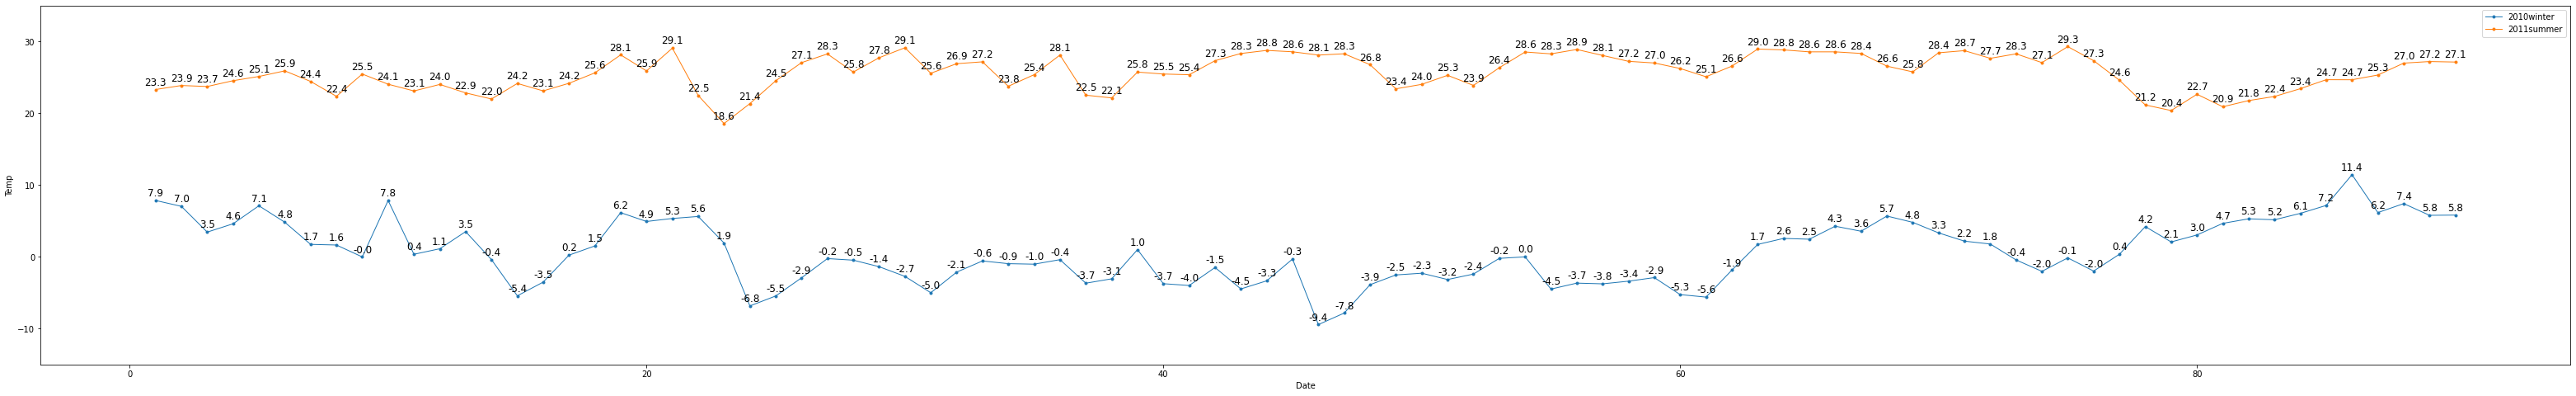

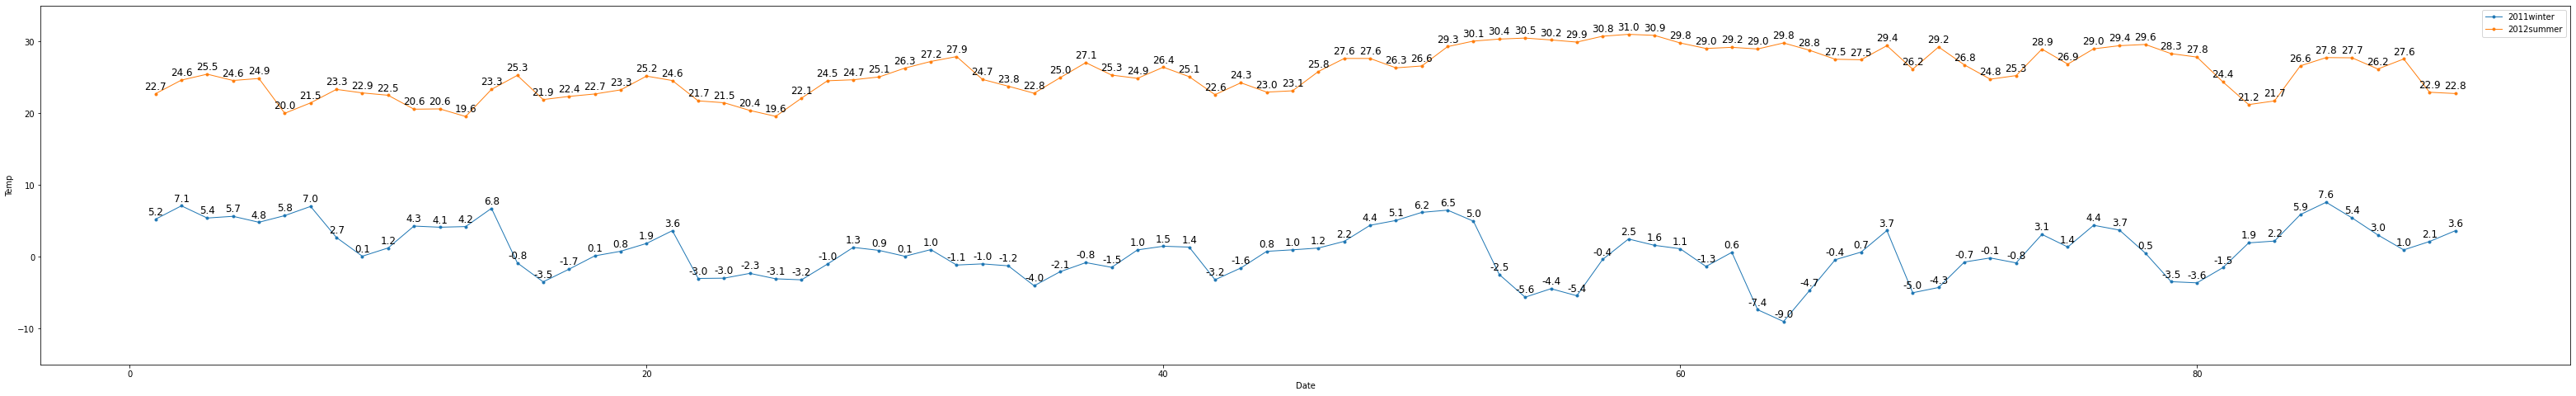

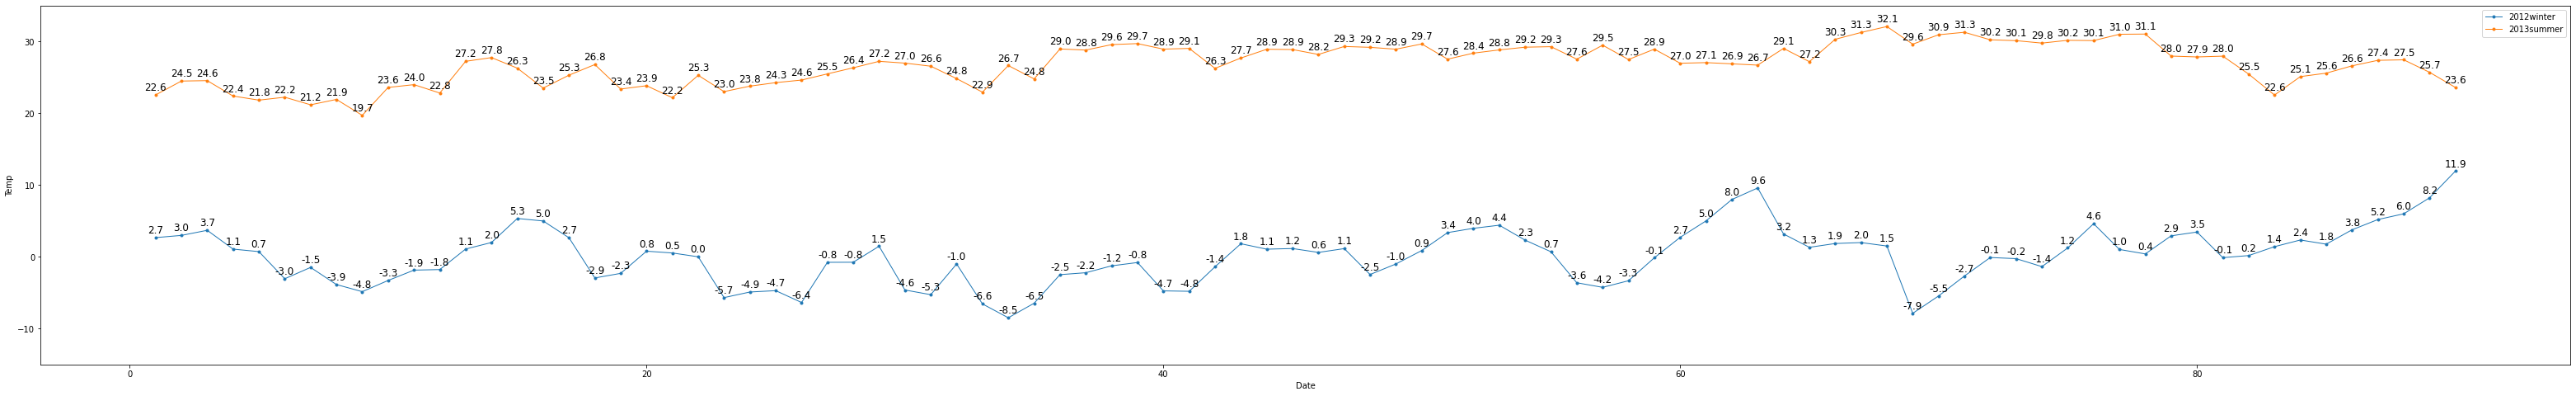

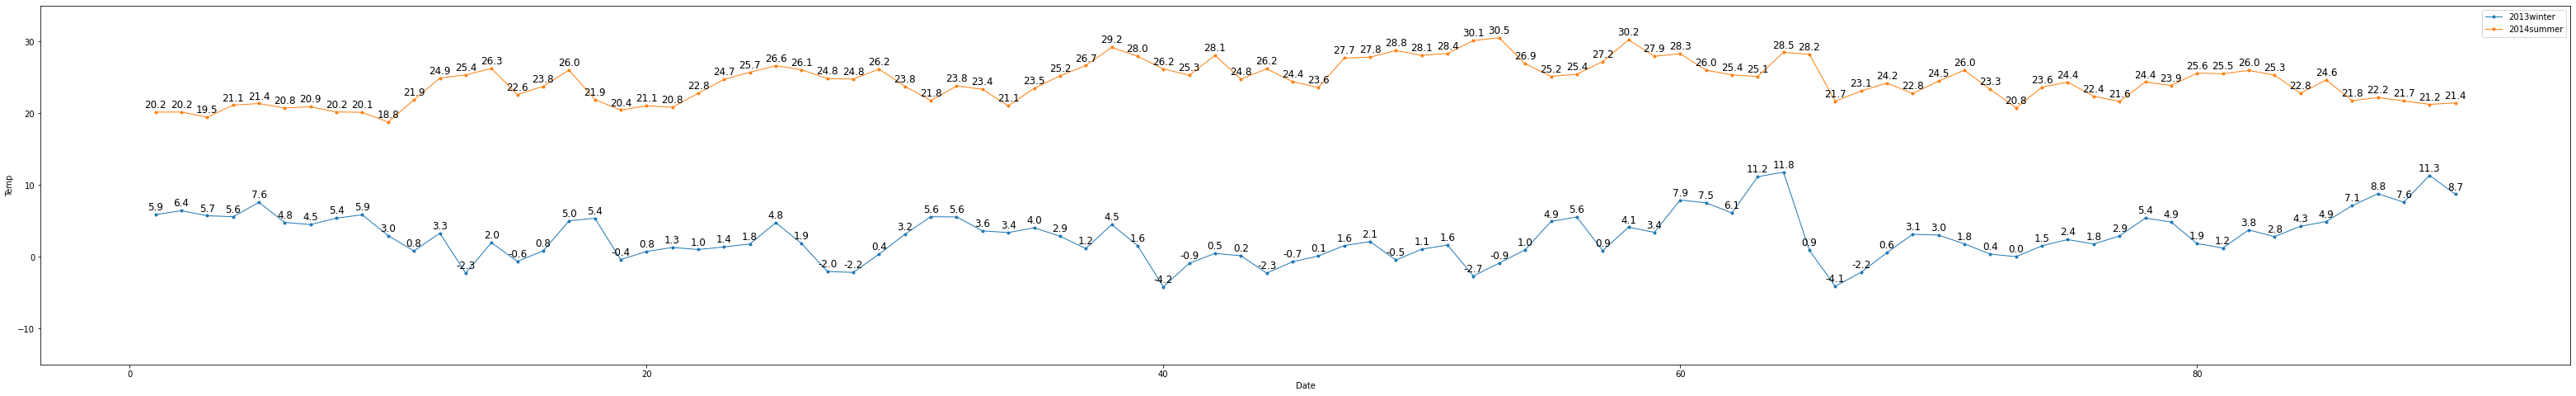

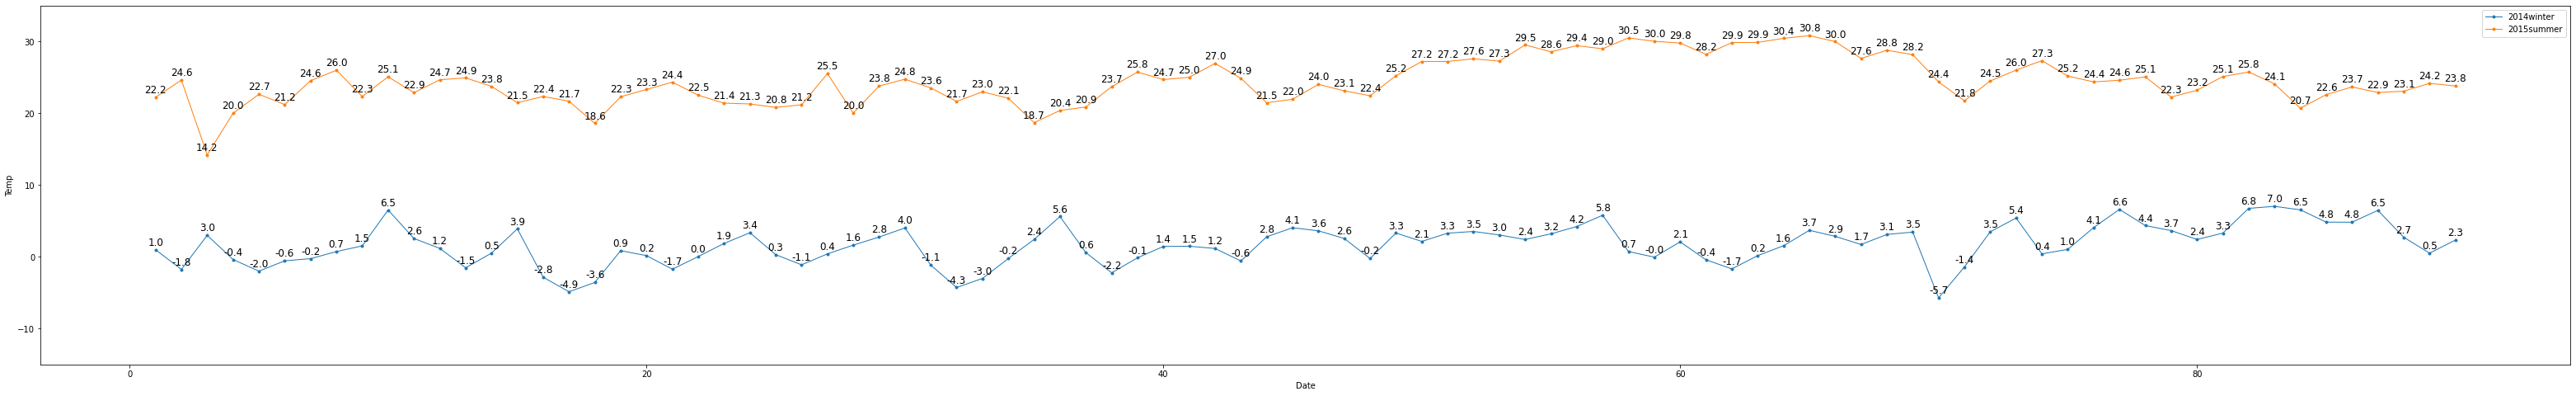

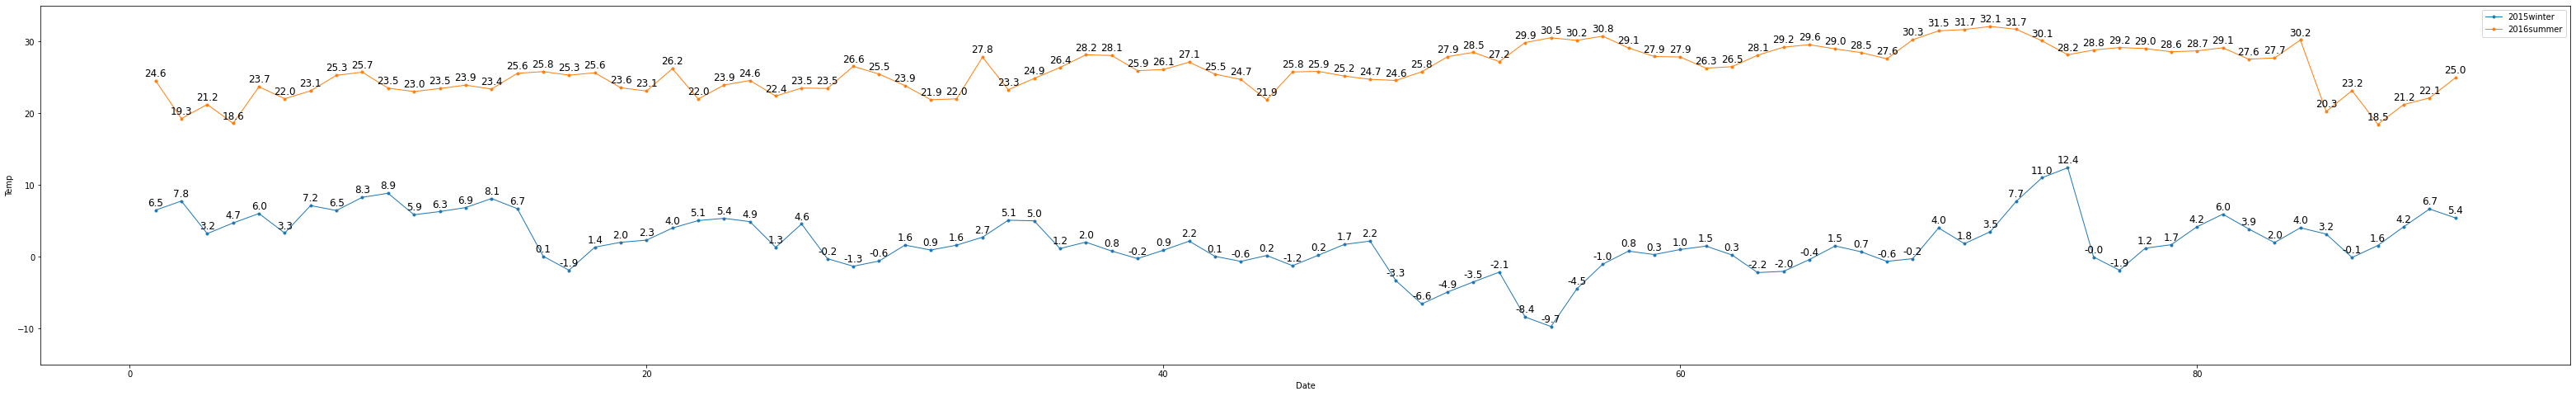

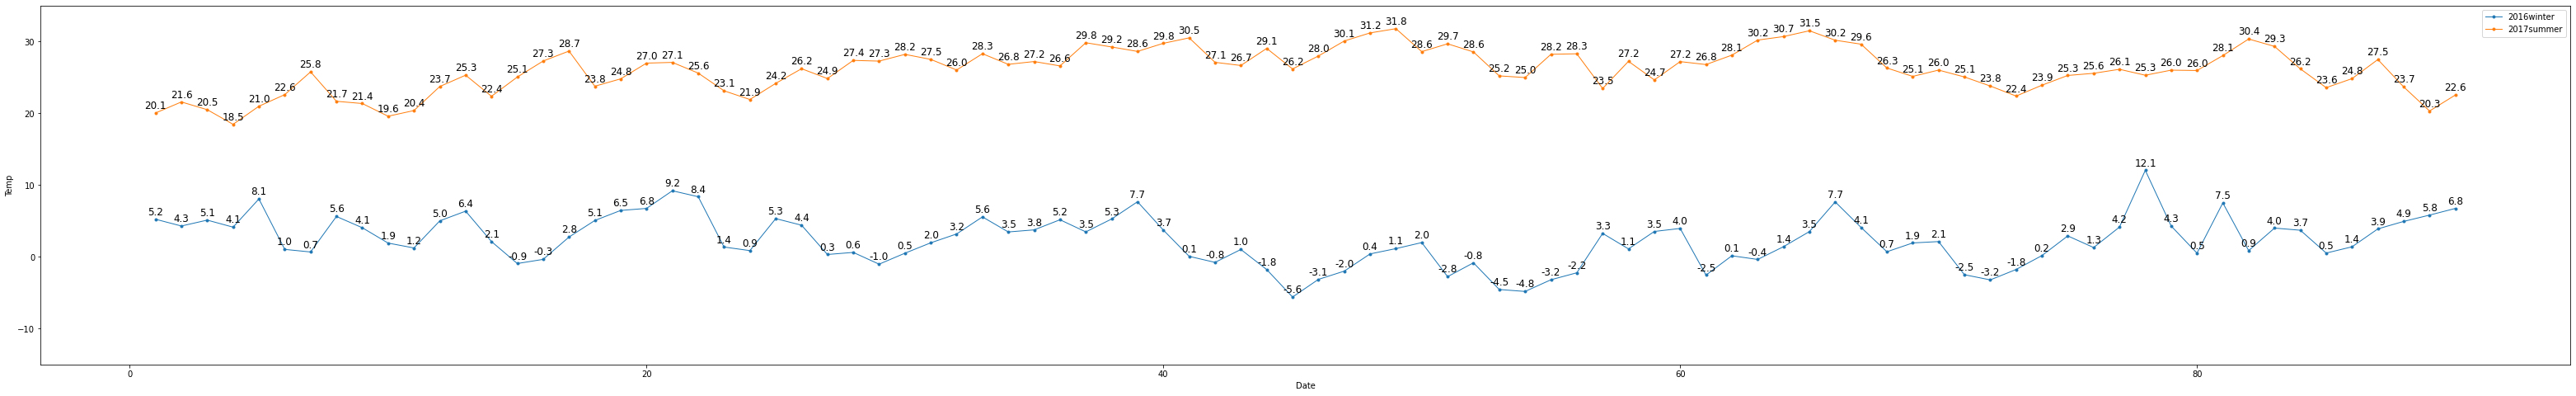

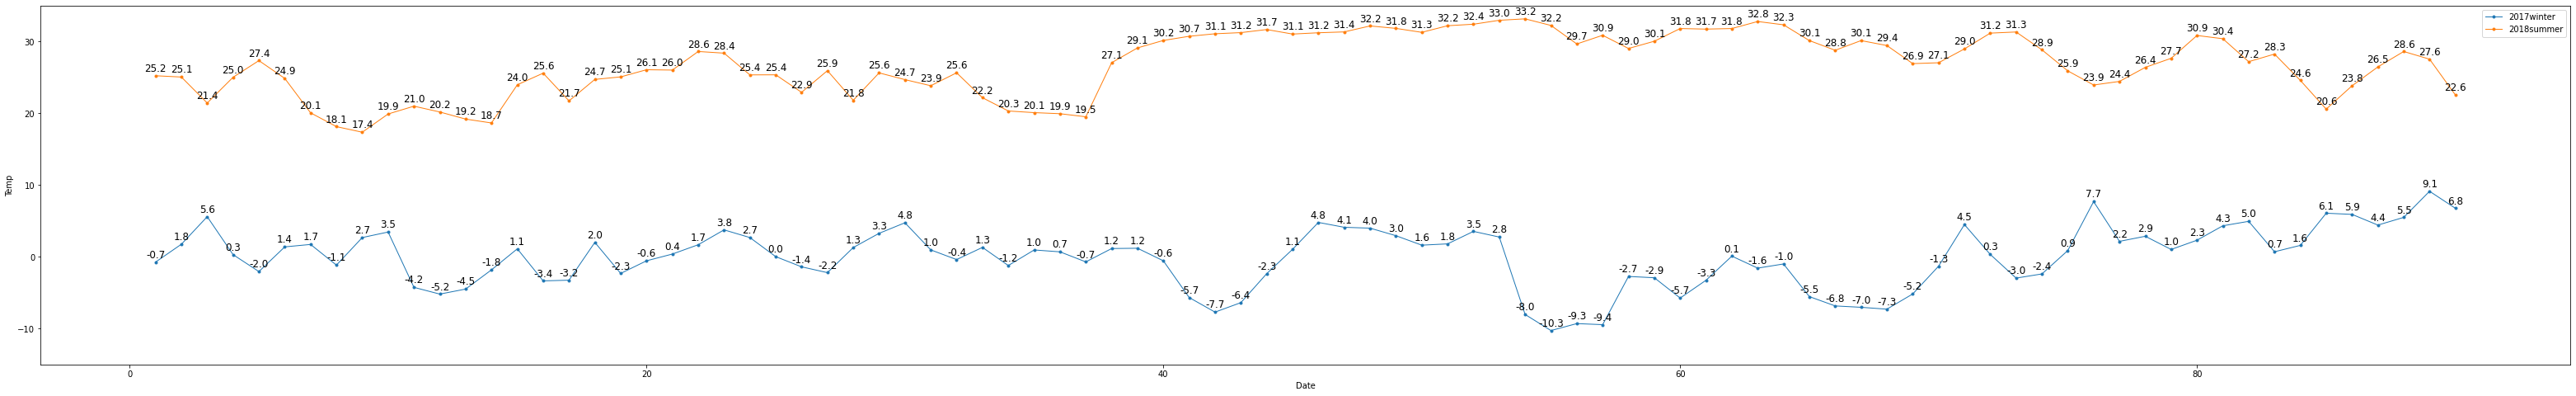

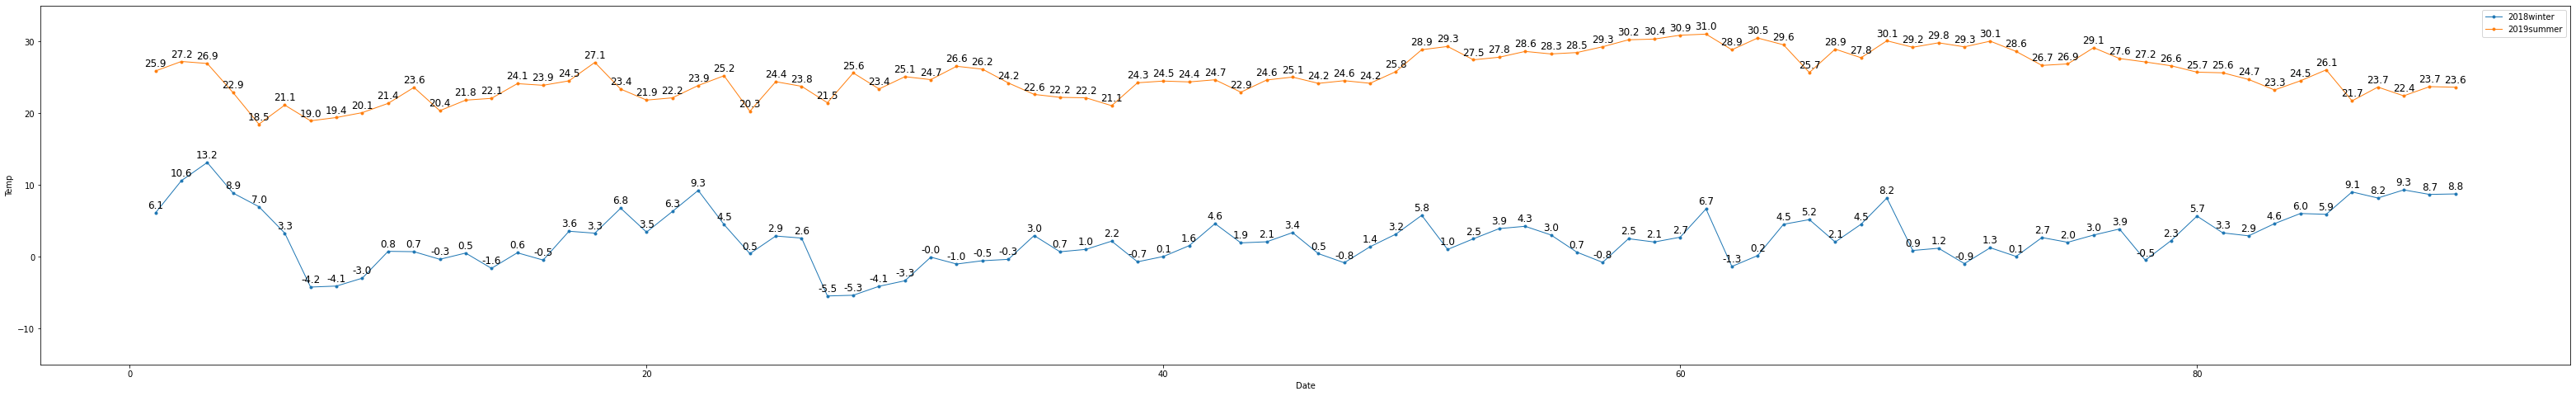

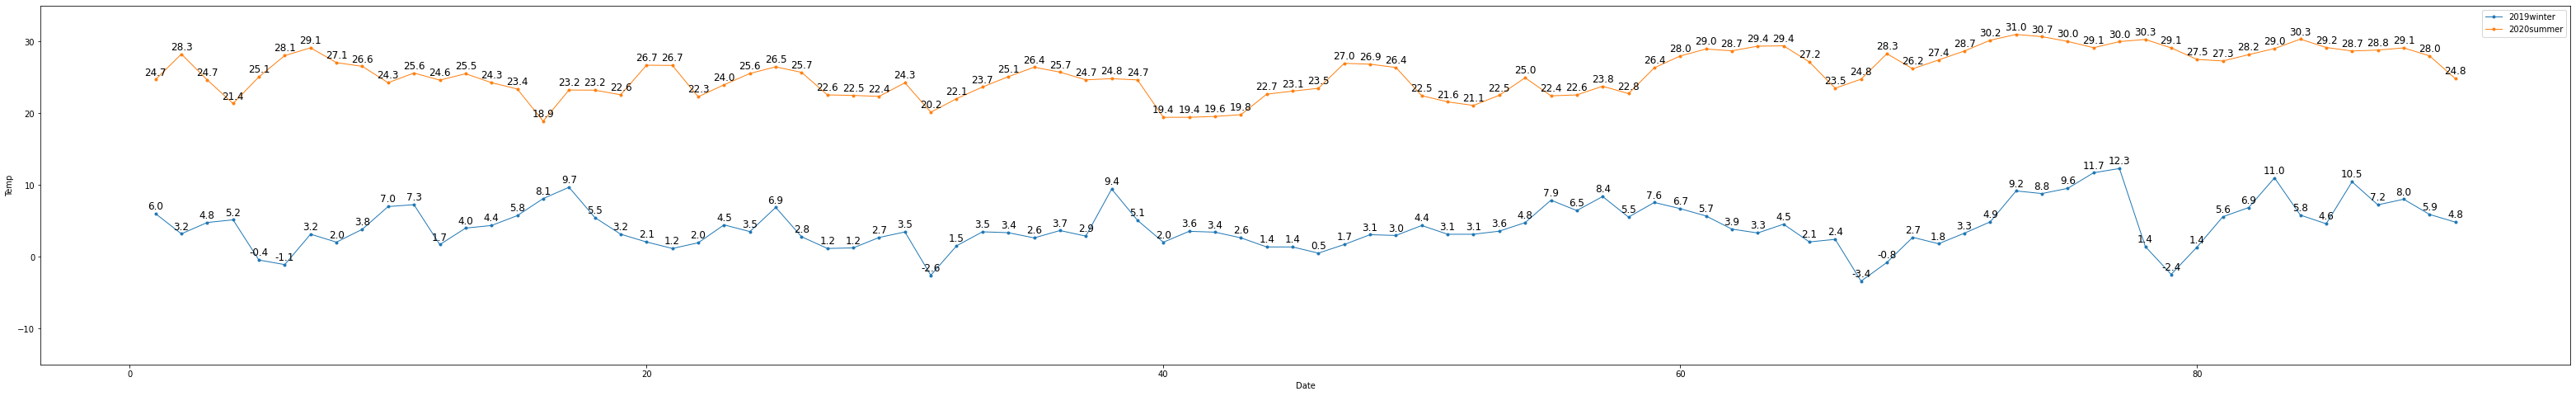

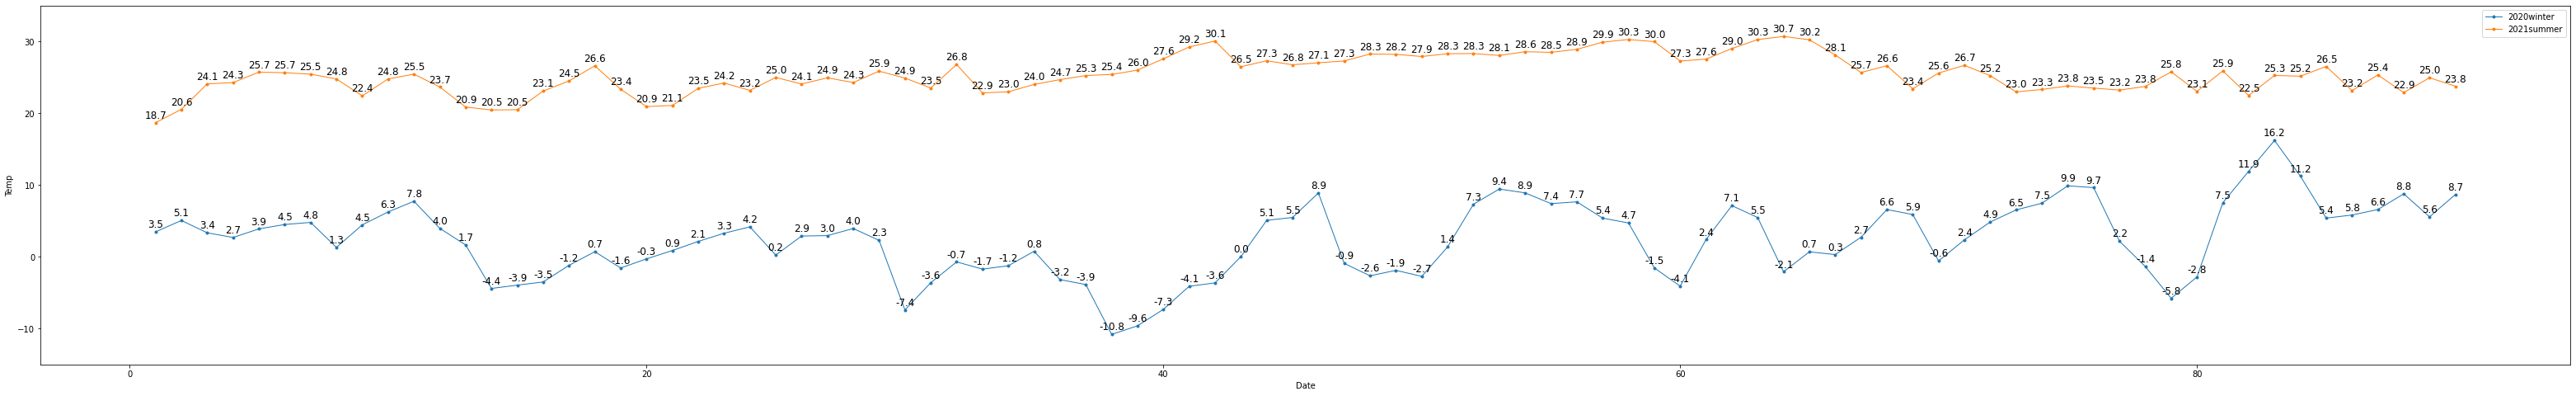

In [22]:
for i in range(2010,2021):
    win_sum_graph(i,i+1)

#### 2010년 겨울의 기온, 2011년 여름의 기온 비교

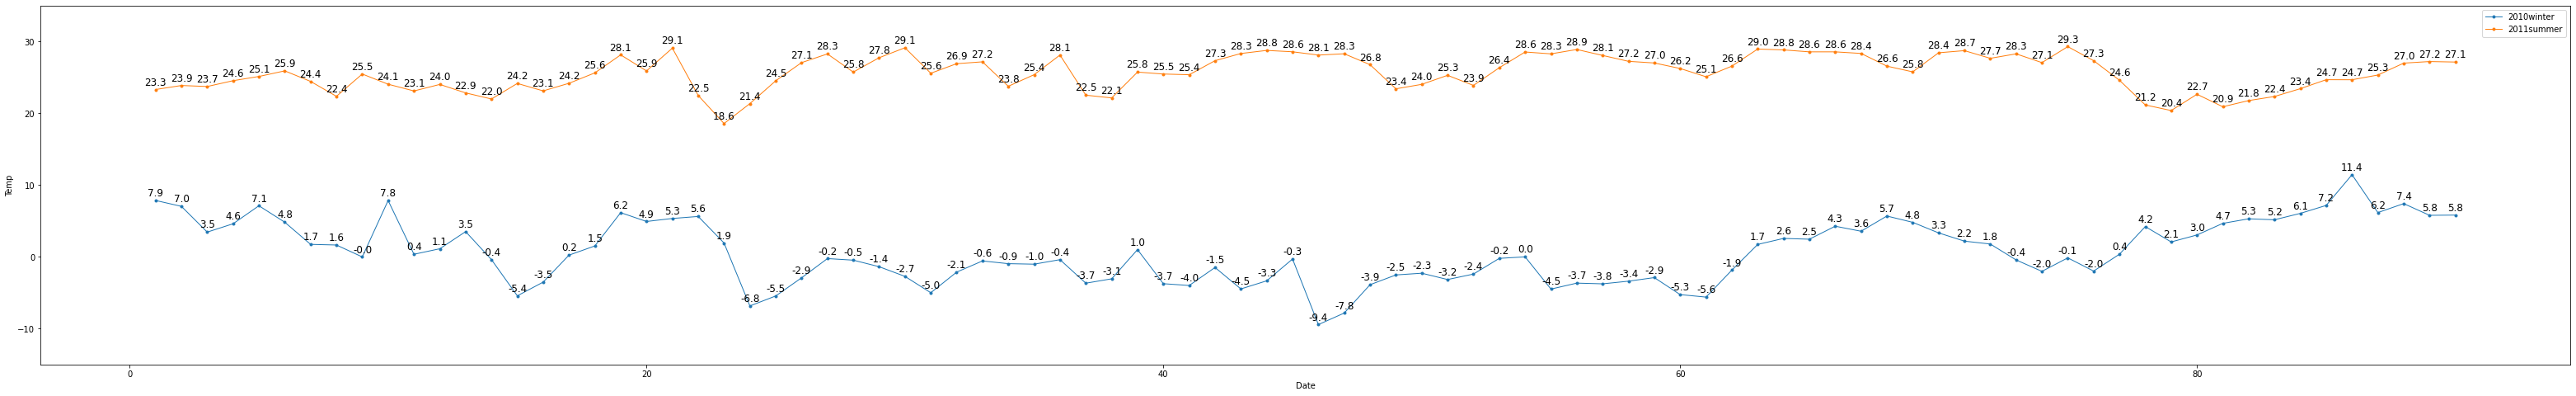

In [23]:
win_sum_graph(2010,2011)

#### 2011년 겨울의 기온, 2012년 여름의 기온 비교

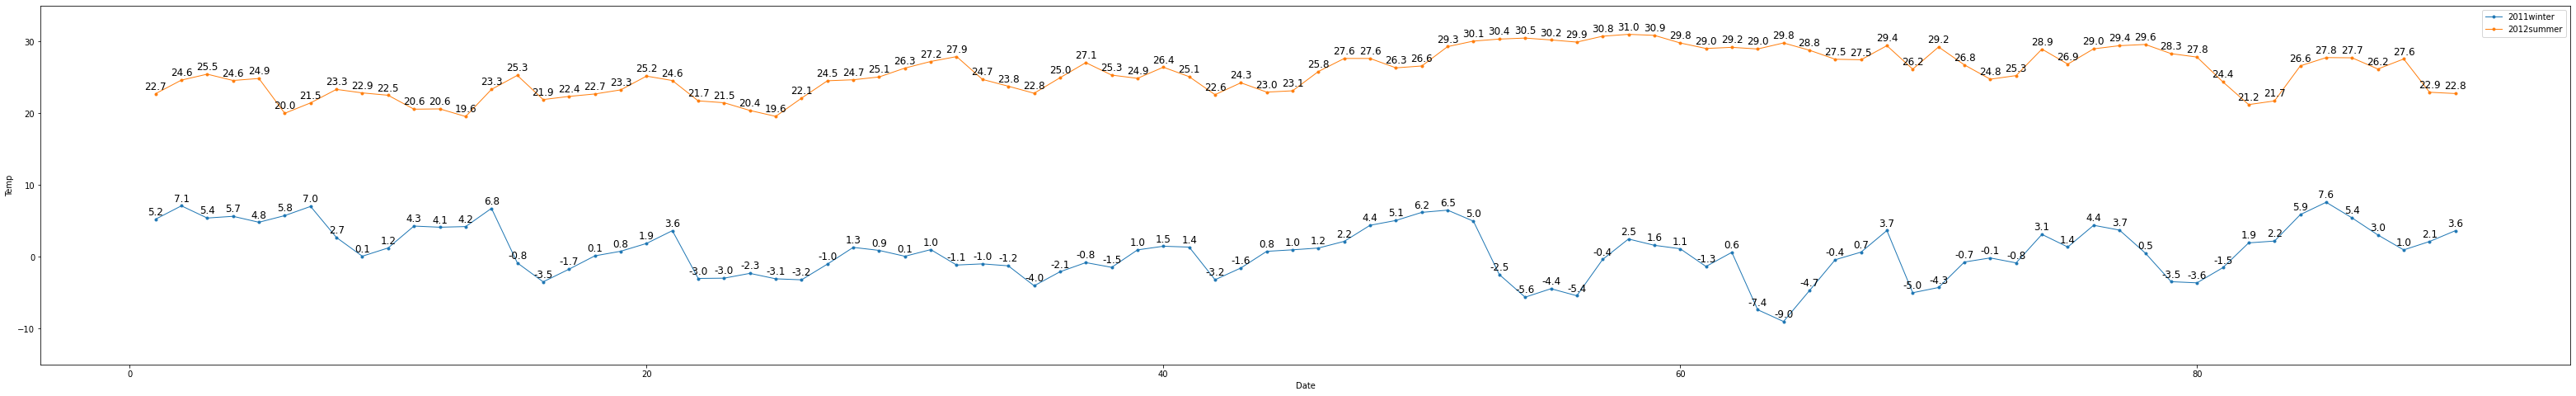

In [24]:
win_sum_graph(2011,2012)

In [25]:
df_pre.head()

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,DI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444,60.743550
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000,62.734310
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668,64.650381
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110,65.727719
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557,67.046081


## X년도의 겨울, (X+1)년도의 여름 열지수(체감온도) 분석

In [26]:
# 필요한 열지수 정보만 가져온다.
HI=temp_pre.loc[:,['year','month','day','hour','HI','region']]
HI.head()

,year,month,day,hour,HI,region
0,2010,6,1,0,15.589444,동인동
1,2010,6,1,1,17.245000,동인동
2,2010,6,1,2,18.926667,동인동
3,2010,6,1,3,20.006111,동인동
4,2010,6,1,4,21.415556,동인동


In [27]:
HI.head(24)

,year,month,day,hour,HI,region
0,2010,6,1,0,15.589444,동인동
1,2010,6,1,1,17.245000,동인동
2,2010,6,1,2,18.926667,동인동
3,2010,6,1,3,20.006111,동인동
4,2010,6,1,4,21.415556,동인동
5,2010,6,1,5,21.583333,동인동
6,2010,6,1,6,21.745556,동인동
7,2010,6,1,7,21.499444,동인동
8,2010,6,1,8,21.347500,동인동
9,2010,6,1,9,21.195556,동인동


In [28]:
# 
index=list(HI[(HI['HI']>=33)].index)
HIGH=HI.loc[index,:]
HIGH[HIGH['month']==5].count()

year      1857
month     1857
day       1857
hour      1857
HI        1857
region    1857
dtype: int64

In [29]:
for i in range(5):
    print('{0}월 총 폭염 시간 수: '.format((i+5))+str(len(HIGH[HIGH['month']==(i+5)]))+'시간',end='\n')

5월 총 폭염 시간 수: 1857시간
6월 총 폭염 시간 수: 13513시간
7월 총 폭염 시간 수: 261762시간
8월 총 폭염 시간 수: 311003시간
9월 총 폭염 시간 수: 15745시간


In [30]:
for j in range(2010,2022):
    temp_HIGH=HIGH[HIGH['year']==j]
    for i in range(5):
        print('{0}년 {1}월 총 폭염 시간 수: '.format(j,(i+5))+str(len(temp_HIGH[temp_HIGH['month']==(i+5)]))+'시간',end='\n')
    print()

2010년 5월 총 폭염 시간 수: 0시간
2010년 6월 총 폭염 시간 수: 1769시간
2010년 7월 총 폭염 시간 수: 19740시간
2010년 8월 총 폭염 시간 수: 42378시간
2010년 9월 총 폭염 시간 수: 9390시간

2011년 5월 총 폭염 시간 수: 0시간
2011년 6월 총 폭염 시간 수: 3177시간
2011년 7월 총 폭염 시간 수: 18735시간
2011년 8월 총 폭염 시간 수: 19734시간
2011년 9월 총 폭염 시간 수: 4551시간

2012년 5월 총 폭염 시간 수: 0시간
2012년 6월 총 폭염 시간 수: 40시간
2012년 7월 총 폭염 시간 수: 22656시간
2012년 8월 총 폭염 시간 수: 25951시간
2012년 9월 총 폭염 시간 수: 4시간

2013년 5월 총 폭염 시간 수: 10시간
2013년 6월 총 폭염 시간 수: 1072시간
2013년 7월 총 폭염 시간 수: 33611시간
2013년 8월 총 폭염 시간 수: 39455시간
2013년 9월 총 폭염 시간 수: 610시간

2014년 5월 총 폭염 시간 수: 1345시간
2014년 6월 총 폭염 시간 수: 105시간
2014년 7월 총 폭염 시간 수: 16945시간
2014년 8월 총 폭염 시간 수: 5070시간
2014년 9월 총 폭염 시간 수: 50시간

2015년 5월 총 폭염 시간 수: 28시간
2015년 6월 총 폭염 시간 수: 5시간
2015년 7월 총 폭염 시간 수: 11959시간
2015년 8월 총 폭염 시간 수: 12389시간
2015년 9월 총 폭염 시간 수: 0시간

2016년 5월 총 폭염 시간 수: 0시간
2016년 6월 총 폭염 시간 수: 121시간
2016년 7월 총 폭염 시간 수: 17797시간
2016년 8월 총 폭염 시간 수: 32981시간
2016년 9월 총 폭염 시간 수: 1시간

2017년 5월 총 폭염 시간 수: 448시간
2017년 6월 총 폭염 시간 수: 1968시간
2017년 7월 총 폭염 시간 

In [31]:
def HI_graph(m,y):
    xs=[str(i+5)+'th month' for i in range(5)]
    ys=y


    plt.figure(figsize=(10,6)) #그래프 크기 지정

    plt.plot(xs,ys,'o-',ms=3,lw=1)
    # plt.xlabel('Month') #그래프 x축 이름(label) 지정
    plt.title('{0}th year summer HI count'.format(m))
    plt.ylabel('HI')
    plt.ylim(0,50000)
    # plt.legend()

    for i in range(len(xs)):
        height=ys[i]
        plt.text(xs[i],height+0.25,'%.f hour'%height,ha='center',va='bottom',size=12)

    # plt.savefig(str(j)+'년도 열지수')

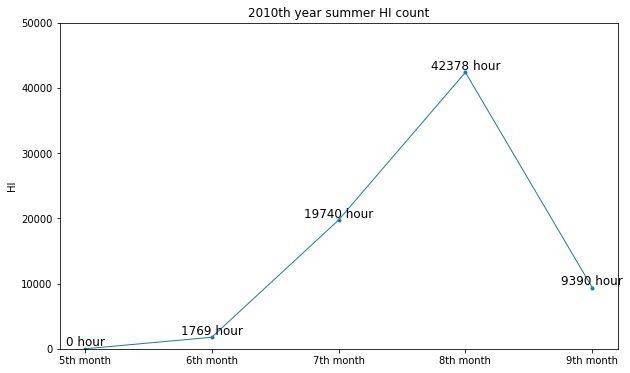

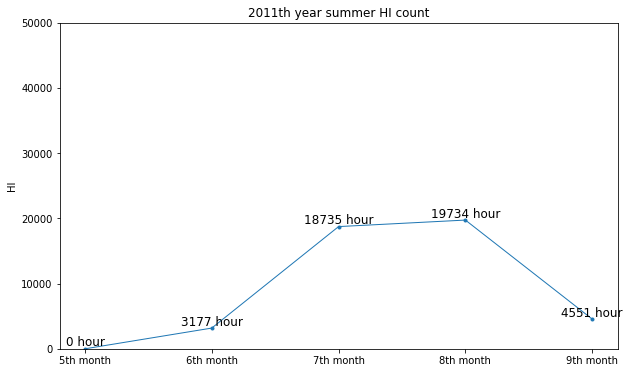

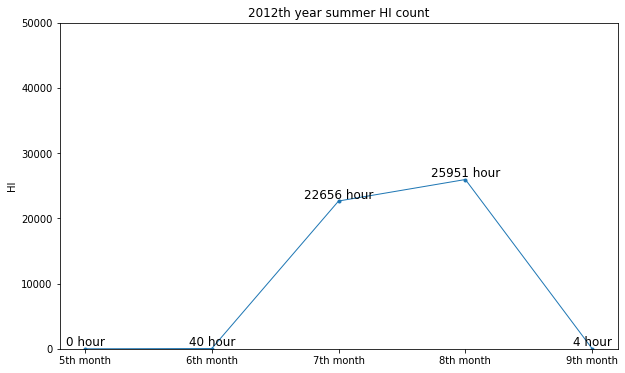

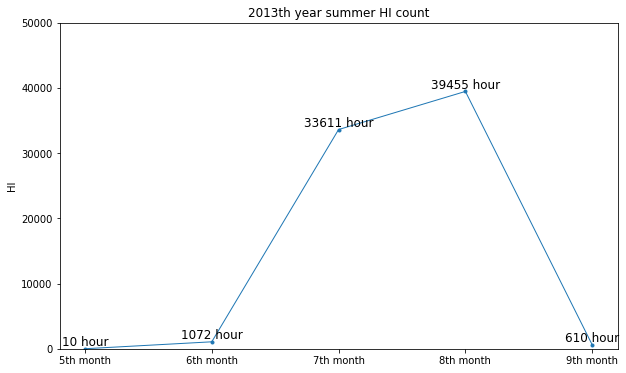

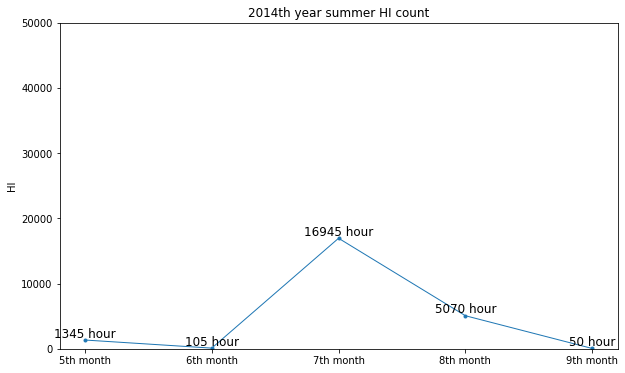

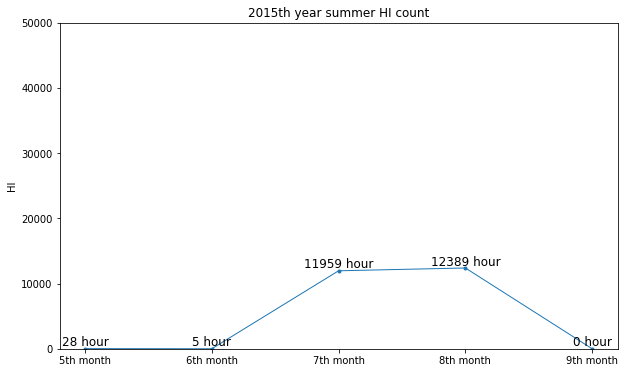

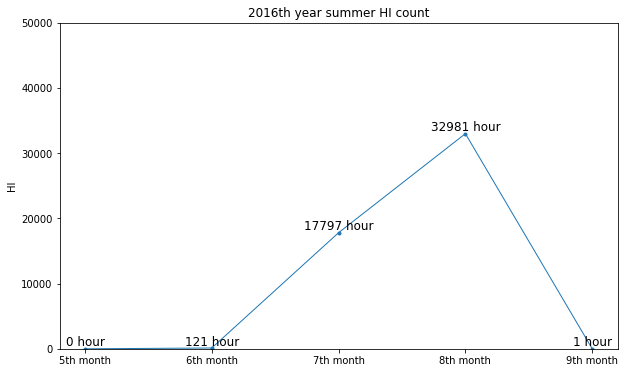

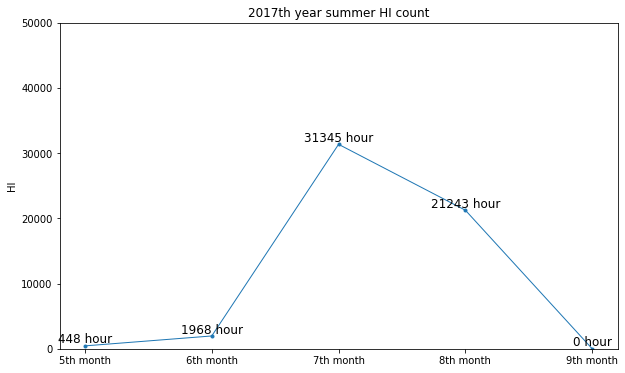

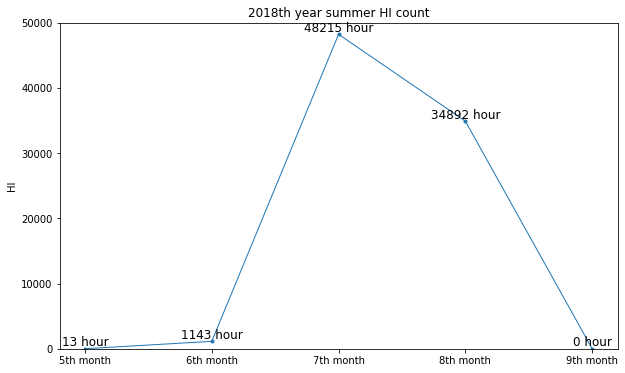

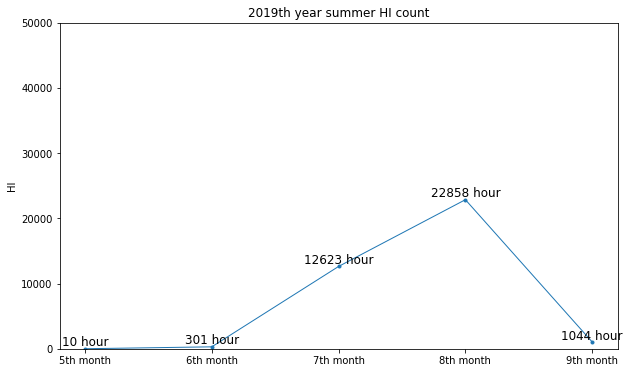

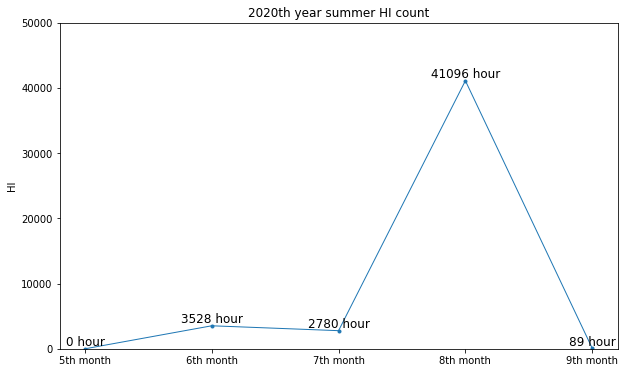

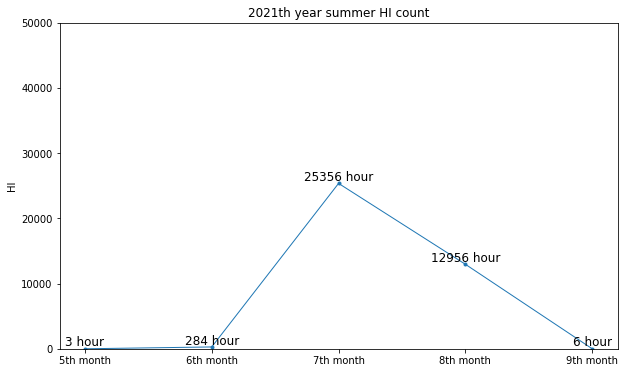

In [32]:
for j in range(2010,2022):
    HI_temp=[]
    temp_HIGH=HIGH[HIGH['year']==j]
    # print('{0}년 폭염 시간 수: '.format(j))
    for i in range(5):
        HI_temp.append(len(temp_HIGH[temp_HIGH['month']==(i+5)]))
    HI_graph(j,HI_temp)
    # print(HI_temp)
    print()

In [ ]:
# 